# Loan Risk Analysis
PeerLoanKart is an NBFC (Non-banking Financial Company) that facilitates peer- to-peer loan. It connects people who need money (borrowers) with people who have money (investors). As an investor, you would want to invest in people who have a high probability of paying you back. You as an ML expert create a model that will help predict whether a borrower will pay the loan or not.

**Objective: Increase profits up to 20% as NPA will be reduced due to loan disbursal for only creditworthy borrowers.**

In [1]:
import pandas as pd

In [3]:
loans=pd.read_csv('loan_borowwer_data.csv')
print(loans.shape)
loans.head(3)

(9578, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


In [6]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'FICO')

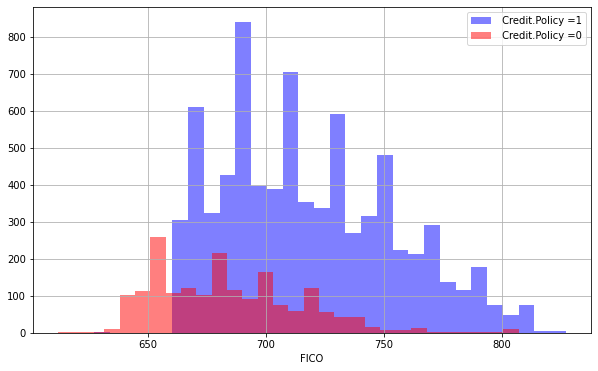

In [7]:
plt.figure(figsize =(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label=' Credit.Policy =1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label=' Credit.Policy =0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

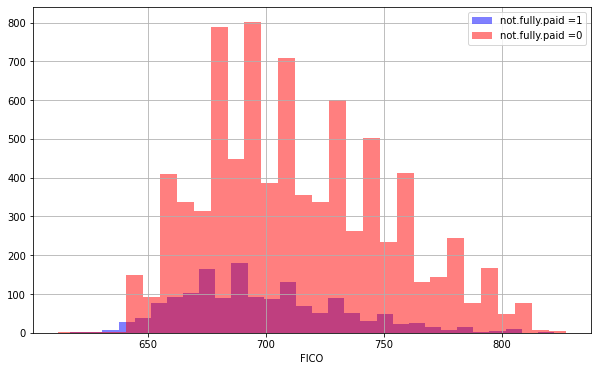

In [8]:
plt.figure(figsize =(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid =1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid =0')
plt.legend()
plt.xlabel('FICO')

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='purpose', ylabel='count'>

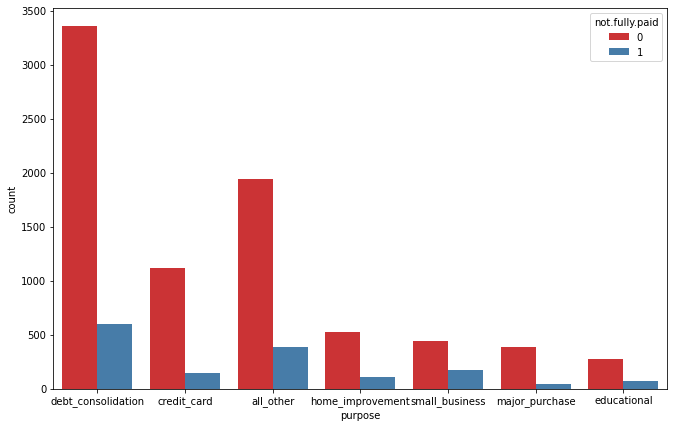

In [10]:
plt.figure(figsize =(11,7))
sns.countplot( x='purpose',hue= 'not.fully.paid',data =loans,palette ='Set1')

In [11]:
final_data=pd.get_dummies(loans,columns=['purpose'],drop_first=True)
final_data.head(3)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0


In [12]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

***

In [13]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [14]:
X

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


### checking for Imbalanced Classification:

In [17]:
y.value_counts()/loans.shape[0]

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<AxesSubplot:>

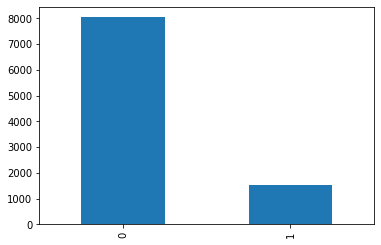

In [18]:
y.value_counts().plot(kind='bar')

#### Build a classification model Without Sampling:

In [19]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.3)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtm=DecisionTreeClassifier()
dtm.fit(Xtrain,ytrain)
predicted=dtm.predict(Xtest)

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,predicted))

from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,predicted)


0.743910925539318


array([[2021,  405],
       [ 331,  117]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2426
           1       0.22      0.26      0.24       448

    accuracy                           0.74      2874
   macro avg       0.54      0.55      0.54      2874
weighted avg       0.76      0.74      0.75      2874



##### RandomForest:

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier()
rfm.fit(Xtrain,ytrain)
predicted_rfm=rfm.predict(Xtest)

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,predicted_rfm))

from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,predicted_rfm)


0.8455114822546973


array([[2418,   13],
       [ 431,   12]], dtype=int64)

****
### Applying Oversampling and Undersampling (Data Augmentation ):

In [25]:
from collections import Counter
Counter(y)

Counter({0: 8045, 1: 1533})

#### Random Oversampling Minority class:

In [31]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
# over = RandomOverSampler(sampling_strategy='minority')
over = RandomOverSampler(sampling_strategy=0.8)

In [33]:
X_over, y_over = over.fit_resample(X, y)

In [34]:
Counter(y_over)
print(f"Oversampled: {Counter(y_over)}")

Oversampled: Counter({0: 8045, 1: 6436})


<AxesSubplot:>

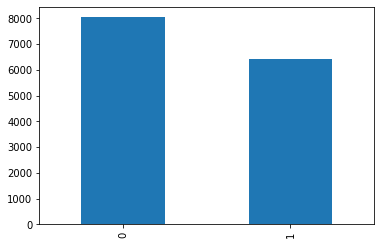

In [36]:
y_over.value_counts().plot(kind='bar')

In [35]:
8045*.8

6436.0

#### Random Underampling Majority class:

In [40]:
from imblearn.under_sampling import RandomUnderSampler
# under = RandomUnderSampler(sampling_strategy='majority')
under = RandomUnderSampler(sampling_strategy=0.9)

X2, y2 = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y2)}")

Combined Random Sampling: Counter({0: 7151, 1: 6436})


<AxesSubplot:>

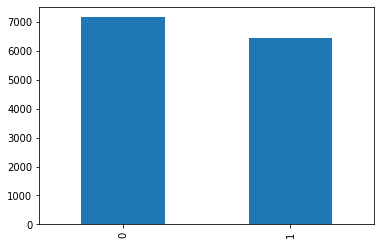

In [41]:
y2.value_counts().plot(kind='bar')

In [69]:
6436/7151   #=90%

0.9000139840581737

#### With Sampling:

In [42]:
from sklearn.model_selection import train_test_split
Xtrain2,Xtest2,ytrain2,ytest2=train_test_split(X2,y2,test_size=.3)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtm=DecisionTreeClassifier()
dtm.fit(Xtrain2,ytrain2)
predicted2=dtm.predict(Xtest2)

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest2,predicted2))

from sklearn.metrics import classification_report
classification_report(ytest2,predicted2)

from sklearn.metrics import confusion_matrix
confusion_matrix(ytest2,predicted2)


0.8690213392200147


array([[1654,  479],
       [  55, 1889]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest2,predicted2))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      2133
           1       0.80      0.97      0.88      1944

    accuracy                           0.87      4077
   macro avg       0.88      0.87      0.87      4077
weighted avg       0.89      0.87      0.87      4077



##### Random Forest:

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier()
rfm.fit(Xtrain2,ytrain2)
predicted_rfm=rfm.predict(Xtest2)

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest2,predicted_rfm))

from sklearn.metrics import confusion_matrix
confusion_matrix(ytest2,predicted_rfm)


0.9440765268579838


array([[1973,  160],
       [  68, 1876]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest2,predicted_rfm))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2133
           1       0.92      0.97      0.94      1944

    accuracy                           0.94      4077
   macro avg       0.94      0.95      0.94      4077
weighted avg       0.95      0.94      0.94      4077

